<a href="https://colab.research.google.com/github/pcat125/categorical-date-issues/blob/main/DS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```##Pip install any missing dependancies
# This is formatted as code
```



In [ ]:
pip install seaborn

In [19]:
import tensorflow as tf

In [20]:
import pandas as pd

In [21]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

###gather covid data for ds ML EXPER

In [ ]:
df_covid_deaths = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df_covid_deaths.head(23)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
5,2020-01-25,California,6,1,0
6,2020-01-25,Illinois,17,1,0
7,2020-01-25,Washington,53,1,0
8,2020-01-26,Arizona,4,1,0
9,2020-01-26,California,6,2,0


##examine data from DS perspective

In [24]:
##examine data from DS perspective

###EXPLORE DATA

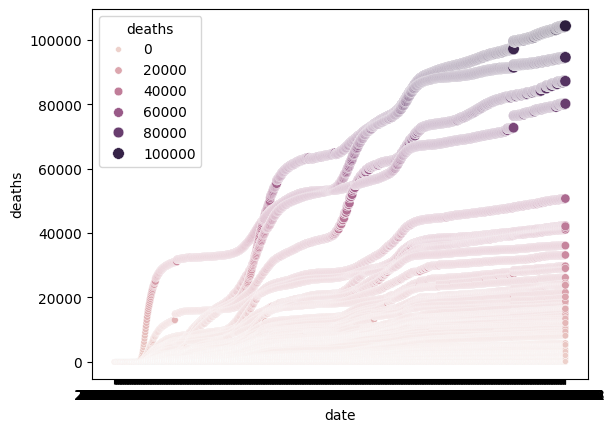

In [ ]:
sns.scatterplot(x='date', y='deaths', hue='deaths', size = 'deaths', data=df_covid_deaths)
plt.show()

In [ ]:
df_covid_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61942 entries, 0 to 61941
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    61942 non-null  object
 1   state   61942 non-null  object
 2   fips    61942 non-null  int64 
 3   cases   61942 non-null  int64 
 4   deaths  61942 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.4+ MB


In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(df_covid_deaths, x="date", y="deaths", color="state")
fig.show()

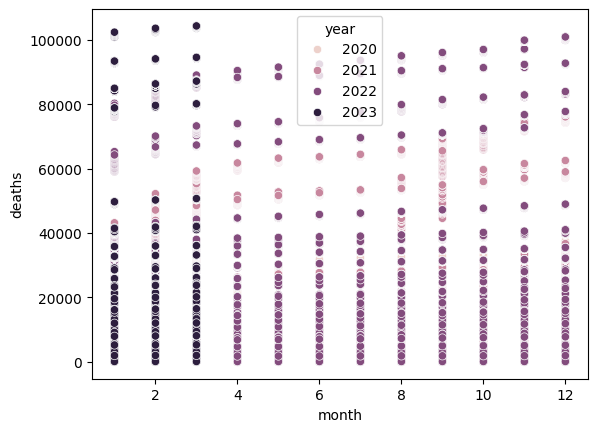

In [ ]:
# prompt: Using dataframe df_covid_deaths: seaborn scatterplot monthly 4 years

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'date' column to datetime
df_covid_deaths['date'] = pd.to_datetime(df_covid_deaths['date'])

# Extract month and year from the date column
df_covid_deaths['month'] = df_covid_deaths['date'].dt.month
df_covid_deaths['year'] = df_covid_deaths['date'].dt.year

# Filter for the last 4 years
df_covid_deaths_recent = df_covid_deaths[df_covid_deaths['year'].isin([2020, 2021, 2022, 2023])]

# Create the scatterplot
sns.scatterplot(x='month', y='deaths', hue='year', data=df_covid_deaths_recent)
plt.show()


In [ ]:
df_covid_deaths.columns


Index(['date', 'state', 'fips', 'cases', 'deaths', 'month', 'year'], dtype='object')

##MACHINE LEARNING

###SUPPORTING DATA CONCLUSIONS WITH A LOG REG MODEL

In [ ]:
# prompt: create  a ml model to analyze if the amount if covid deaths by state had evolved from exponential to logarhythmic

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Group data by state and date, then calculate the total deaths for each state on each date
df_grouped = df_covid_deaths_recent.groupby(['state', 'date'])['deaths'].sum().reset_index()

# Create a new column for the log of deaths
df_grouped['log_deaths'] = np.log(df_grouped['deaths'] + 1)  # Add 1 to avoid log(0)

# Create a new column for the day number since the start of the pandemic
df_grouped['day_number'] = (df_grouped['date'] - df_grouped['date'].min()).dt.days

# Split the data into training and testing sets
X = df_grouped[['day_number']]
y_deaths = df_grouped['deaths']
y_log_deaths = df_grouped['log_deaths']
X_train, X_test, y_deaths_train, y_deaths_test, y_log_deaths_train, y_log_deaths_test = train_test_split(
    X, y_deaths, y_log_deaths, test_size=0.2, random_state=42)

# Train linear regression models for both deaths and log deaths
model_deaths = LinearRegression()
model_deaths.fit(X_train, y_deaths_train)
y_deaths_pred = model_deaths.predict(X_test)

model_log_deaths = LinearRegression()
model_log_deaths.fit(X_train, y_log_deaths_train)
y_log_deaths_pred = model_log_deaths.predict(X_test)

# Calculate the mean squared error for both models
mse_deaths = mean_squared_error(y_deaths_test, y_deaths_pred)
mse_log_deaths = mean_squared_error(y_log_deaths_test, y_log_deaths_pred)

# Compare the MSE values
print(f"MSE for deaths: {mse_deaths}")
print(f"MSE for log deaths: {mse_log_deaths}")

if mse_log_deaths < mse_deaths:
  print("Logarithmic model fits better.")
else:
  print("Exponential model fits better.")


MSE for deaths: 255304797.48431414
MSE for log deaths: 4.308832076773572
Logarithmic model fits better.


In [ ]:
top_ten_states = df_covid_deaths['state'].head(10).tolist()
top_ten_states

['Washington',
 'Washington',
 'Washington',
 'Illinois',
 'Washington',
 'California',
 'Illinois',
 'Washington',
 'Arizona',
 'California']

In [ ]:
df_covid_deaths.shape

(61942, 7)

In [ ]:
top_ten_states = df_covid_deaths['state'].head(10).tolist()
top_ten_states

['Washington',
 'Washington',
 'Washington',
 'Illinois',
 'Washington',
 'California',
 'Illinois',
 'Washington',
 'Arizona',
 'California']

In [ ]:
top_state_df = df_covid_deaths[df_covid_deaths['state'].isin(top_ten_states)]
top_state_df.head()

,date,state,fips,cases,deaths,month,year
0,2020-01-21,Washington,53,1,0,1,2020
1,2020-01-22,Washington,53,1,0,1,2020
2,2020-01-23,Washington,53,1,0,1,2020
3,2020-01-24,Illinois,17,1,0,1,2020
4,2020-01-24,Washington,53,1,0,1,2020


from matplotlib import pyplot as plt
_df_8['fips'].plot(kind='hist', bins=20, title='fips')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('state').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['fips']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('state')):
  _plot_series(series, series_name, i)
  fig.legend(title='state', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('fips')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('state')):
  _plot_series(series, series_name, i)
  fig.legend(title='state', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['fips']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('state')):
  _plot_series(series, series_name, i)
  fig.legend(title='state', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('fips')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('state')):
  _plot_series(series, series_name, i)
  fig.legend(title='state', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_14['fips'].plot(kind='line', figsize=(8, 4), title='fips')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['state'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='fips', y='state', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Figure size 1500x500 with 0 Axes>

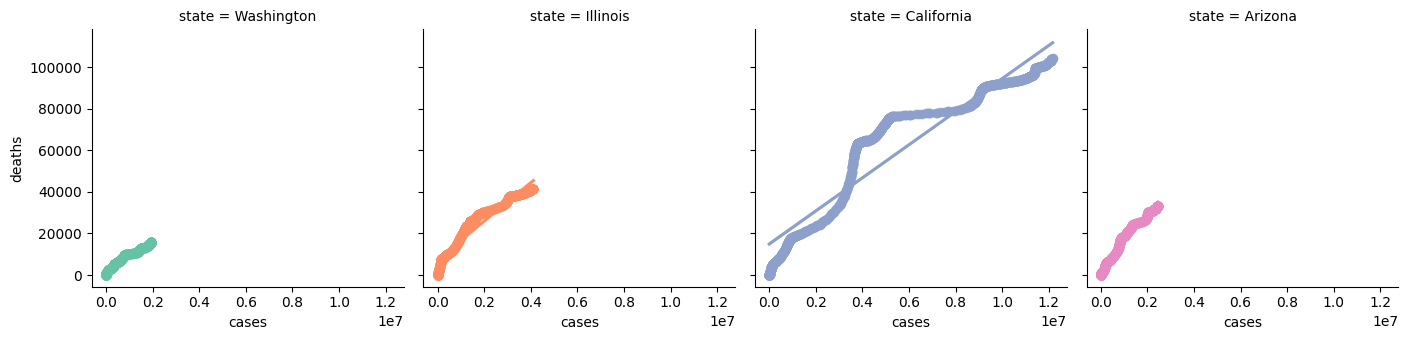

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
import seaborn as sns
sns.lmplot(x='cases', y='deaths', height= 3.5 , col = 'state', col_wrap=5, hue ='state', palette='Set2', data=top_state_df)
plt.show()

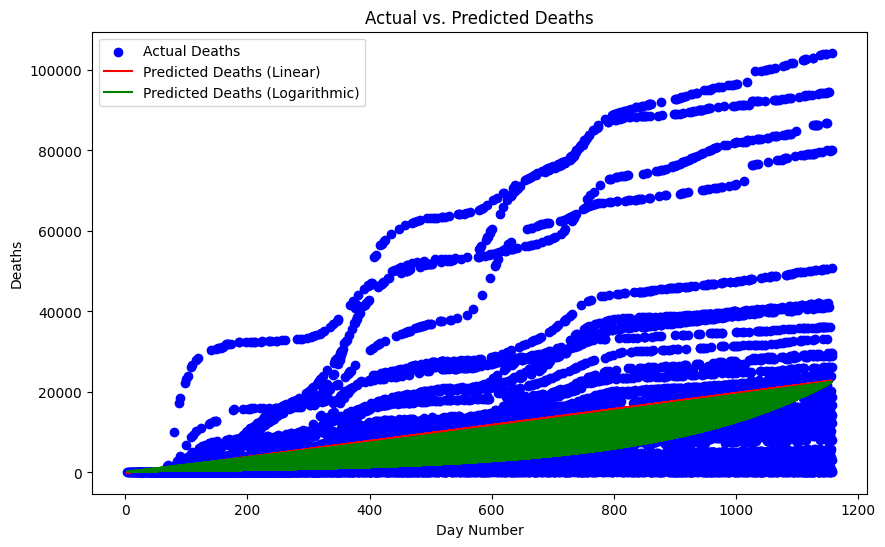

In [ ]:
# prompt: create a plot to best reflect this assertion by model

plt.figure(figsize=(10, 6))
plt.scatter(X_test['day_number'], y_deaths_test, color='blue', label='Actual Deaths')
plt.plot(X_test['day_number'], y_deaths_pred, color='red', label='Predicted Deaths (Linear)')
plt.plot(X_test['day_number'], np.exp(y_log_deaths_pred) - 1, color='green', label='Predicted Deaths (Logarithmic)')
plt.xlabel('Day Number')
plt.ylabel('Deaths')
plt.title('Actual vs. Predicted Deaths')
plt.legend()
plt.show()


##CONCL

### PICKING THROUGH COVID csv DATASET reported by the NY Times  A Data Science  LENS- IT APPEARS THAT THE DEATH RATE MAY HAVE MOVED FROM EXPONENTIAL GROWTH TO LOGARHYTMIC in 2023 AND INDICATES THE AREA WHERE COVID HAS begun to top out - THE MODEL SUPPORTS THE ASSESSMENT and now in the  year 2024-  the actual death rate  is in line with both the  DS hypothesis and the ML prediction- we will be creating a CI on the github side for  demonstration purposes